<a href="https://colab.research.google.com/github/MuhammadFudhail/F55122021_Muhamamad_Fudhail/blob/main/Quiz_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#1

import cv2
# import matplotlib.pyplot as plt
from PIL import Image

# Baca gambar menggunakan OpenCV
gambar_opencv = cv2.imread('/content/Plat.jpeg')

# Konversi gambar ke format RGB (PIL)
gambar_pil = Image.fromarray(cv2.cvtColor(gambar_opencv, cv2.COLOR_BGR2RGB))

# Tampilkan gambar
gambar_pil.show()


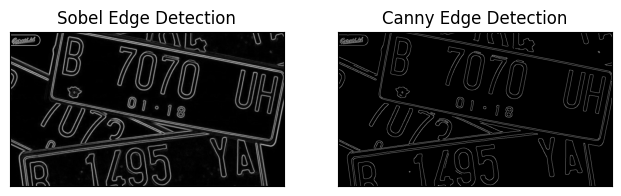

In [8]:
#2
import cv2
import matplotlib.pyplot as plt

# Baca gambar menggunakan OpenCV
gambar_opencv = cv2.imread('/content/Plat.jpeg', cv2.IMREAD_GRAYSCALE)

# Deteksi tepi menggunakan filter Sobel
sobel_x = cv2.Sobel(gambar_opencv, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gambar_opencv, cv2.CV_64F, 0, 1, ksize=5)
sobel_mag = cv2.magnitude(sobel_x, sobel_y)

# Deteksi tepi menggunakan algoritma Canny
canny = cv2.Canny(gambar_opencv, 100, 200)

# Tampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(sobel_mag, cmap='gray')
plt.title('Sobel Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])

plt.show()


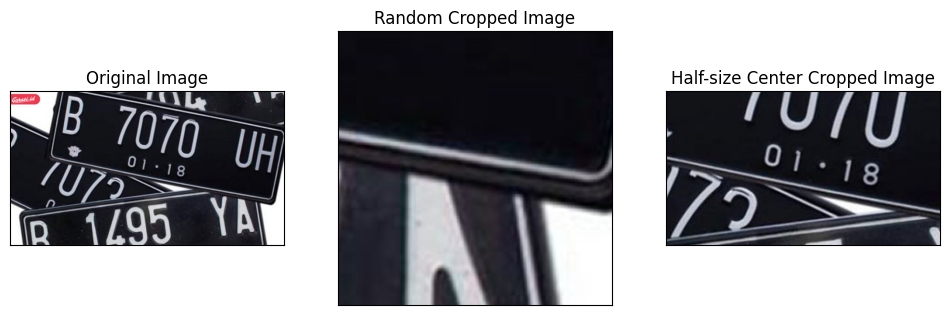

In [10]:
#3
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar menggunakan OpenCV
gambar = cv2.imread('/content/Plat.jpeg')

# Fungsi untuk melakukan cropping acak
def random_crop(image, crop_height, crop_width):
    height, width = image.shape[:2]
    x = np.random.randint(0, width - crop_width)
    y = np.random.randint(0, height - crop_height)
    return image[y:y+crop_height, x:x+crop_width]

# Fungsi untuk melakukan cropping setengah ukuran pusat
def center_crop_half(image):
    height, width = image.shape[:2]
    new_height = height // 2
    new_width = width // 2
    start_height = (height - new_height) // 2
    start_width = (width - new_width) // 2
    return image[start_height:start_height+new_height, start_width:start_width+new_width]

# Cropping acak dengan ukuran 200x200
cropped_random = random_crop(gambar, 200, 200)

# Cropping setengah ukuran pusat
cropped_center_half = center_crop_half(gambar)

# Tampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(cv2.cvtColor(cropped_random, cv2.COLOR_BGR2RGB))
plt.title('Random Cropped Image'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(cv2.cvtColor(cropped_center_half, cv2.COLOR_BGR2RGB))
plt.title('Half-size Center Cropped Image'), plt.xticks([]), plt.yticks([])

plt.show()


In [ ]:
#4
import cv2
import matplotlib.pyplot as plt

# Baca gambar menggunakan OpenCV
gambar_opencv = cv2.imread('/content/Plat.jpeg', cv2.IMREAD_GRAYSCALE)

# Lakukan inversi warna
inversi = cv2.bitwise_not(gambar_opencv)

# Tampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(121), plt.imshow(gambar_opencv, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(inversi, cmap='gray')
plt.title('Inverted Image'), plt.xticks([]), plt.yticks([])

plt.show()

Text(0.5, 1.0, 'Salt and Pepper Noisy Image')

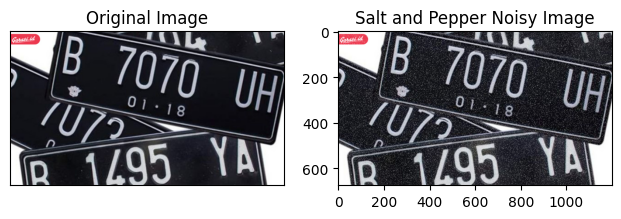

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar menggunakan OpenCV
gambar = cv2.imread('/content/Plat.jpeg')

# Tambahkan noise salt and pepper
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noise = np.zeros_like(image)
    salt_mask = np.random.rand(*image.shape[:2]) < salt_prob
    pepper_mask = np.random.rand(*image.shape[:2]) < pepper_prob
    noise[salt_mask] = 255
    noise[pepper_mask] = 0
    noisy_image = cv2.add(image, noise)
    return np.clip(noisy_image, 0, 255)

# Tambahkan noise Gaussian
def add_gaussian_noise(image, mean, stddev):
    noise = np.random.normal(mean, stddev, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return np.clip(noisy_image, 0, 255)

# Amankan noise salt and pepper
salt_pepper_noisy = add_salt_and_pepper_noise(gambar, salt_prob=0.05, pepper_prob=0.05)

# Amankan noise Gaussian
gaussian_noisy = add_gaussian_noise(gambar, mean=0, stddev=25)

# Tampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(cv2.cvtColor(salt_pepper_noisy, cv2.COLOR_BGR2RGB))
plt.title('Salt and Pepper Noisy Image')


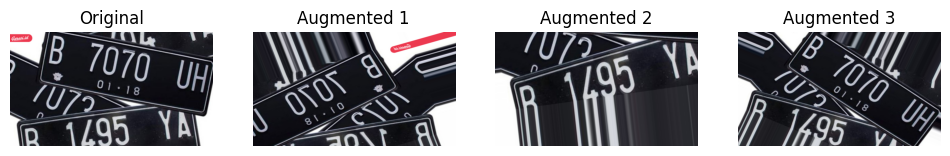

In [11]:
#6
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Membaca gambar
image_path = ('/content/Plat.jpeg')
image = load_img(image_path)
image = img_to_array(image)

# Mengubah dimensi gambar menjadi (1, height, width, channels)
image = np.expand_dims(image, axis=0)

# Inisialisasi generator augmentasi
datagen = ImageDataGenerator(
    rotation_range=30,  # Rentang rotasi 30 derajat
    width_shift_range=0.2,  # Rentang pergeseran horizontal 20% dari lebar gambar
    height_shift_range=0.2,  # Rentang pergeseran vertikal 20% dari tinggi gambar
    zoom_range=0.2,  # Rentang perbesaran 20%
    horizontal_flip=True,  # Pembalikan horizontal
    fill_mode='nearest'  # Metode pengisian untuk piksel yang hilang
)

# Menghasilkan gambar augmented
augmented_images = []
for _ in range(3):  # Membuat 3 variasi baru dari gambar asli
    batch = datagen.flow(image, batch_size=1)
    augmented_images.append(batch[0][0].astype('uint8'))

# Menampilkan gambar asli dan hasil augmentasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(image[0].astype('uint8'))
plt.title("Original")
plt.axis('off')

for i in range(3):
    plt.subplot(1, 4, i+2)
    plt.imshow(augmented_images[i])
    plt.title(f"Augmented {i+1}")
    plt.axis('off')

plt.show()
